# What is affecting the logerror?

**Quick Notebook Reference**

1. Project Plan
2. Imports
3. Acquire
4. Prep
5. Exploration 
6. Models
7. Model Evaluation
8. Final Conclusions

# Project Plan

**Acquisition, Prep, and Initial Exploration**

- Correct Data types (ie. turn zip code into string)
- Handle Missing Values
- Handle Outliers
- Remove/repair erroneous data


**Exploration with Clustering**

By reducing the noise of the continuous variable, we can possibly see trends easier by turning this continuous variable into clusters and then comparing those clusters with respect to other variables through visualizations or tests

Perform clustering with logerror as the only feature used in the clustering algorithm. Decide on a number of clusters to use, and store the cluster predictions back onto your data frame as cluster_target. Look at the centroids that were produced in this process. What do they tell you?

Use the produced clusters to help you explore through visualization how logerror relates to other variables. (A common way to do this is to use color to indicate the cluster id, and the other variables can be your x-axis and y-axis.

1. Cluster Independent Variables
2. Test the Significance of Clusters


**Modeling**
- Feature Engineering
- Train at least 3 different models
- Evaluate best model on test data


Goal: Improve our original estimate of the log error by using clustering methodologies.

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

#exploration
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy import stats

#py files
import acquire
import prepare
import preprocessing
import explore

# Acquire
- Used an SQL query to bring in Data

# Prepare

In [2]:
zillow = prepare.wrangle_data()

In [3]:
zillow.head(2)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,extras,County
0,3.5,4.0,3100.0,3100.0,33634931.0,-117869207.0,4506.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01,Garage Only,Orange
1,1.0,2.0,1465.0,1465.0,34449266.0,-119281531.0,12647.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,Garage Only,Ventura


In [4]:
zillow.shape

(46843, 16)

# Exploration
- Before beginning exploration we created 4 new variables:
    1. Tax rate = train.taxamount/train.taxvaluedollarcnt
    2. Acres columns = df.lotsizesquarefeet/43560
    3. Dollar/sqft - liveable = df.structuretaxvaluedollarcnt/df.calculatedfinishedsquaref
    4. Dollar/sqft - land = df.landtaxvaluedollarcnt/df.lotsizesquarefeet
    
    
- In this section we will
    1. Cluster the Target Variable (logerror)
    2. Plot the logerror cluster against various features
    3. Explore correlations
    3. Cluster Variables
    4. Stats testing
    
    
    

In [5]:
#bring in the new features
zillow = preprocessing.new_features(zillow)

#split the data into test and train
train, test = preprocessing.split_data(zillow, .7, 123)

#scale the numeric data
scaler, train_scaled, test_scaled = preprocessing.scale_columns(train, test)

## Cluster the Target Variable

- Perform clustering with logerror as the only feature used in the clustering algorithm. 
- Decide on a number of clusters to use, and store the cluster predictions back onto your data frame as cluster_target.
- Look at the centroids that were produced in this process.
    - What do they tell you?

     k       sse
0    2  9.169113
1    3  6.449581
2    4  4.544536
3    5  3.400702
4    6  2.449298
5    7  1.840277
6    8  1.425062
7    9  1.125834
8   10  0.916782
9   11  0.766360
10  12  0.651930
11  13  0.565251
12  14  0.485182
13  15  0.423663
14  16  0.368927
15  17  0.327934
16  18  0.294497
17  19  0.265151


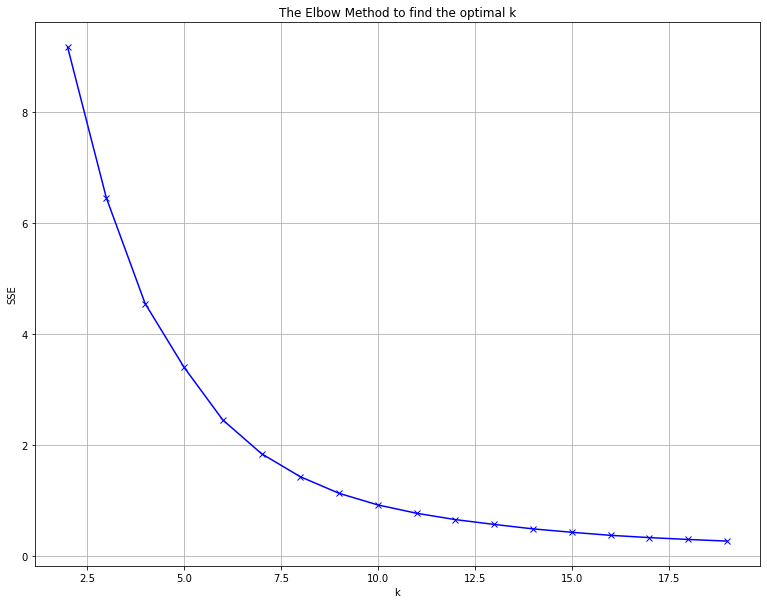

In [6]:
cluster_target = train[["logerror"]]

#Run function to find the optimal k value
explore.find_optimal_k(cluster_target)

- **We are going to go with a k of 6 since it's roughly the center of the elbow**

In [7]:
#cluster and add to train and test
train, test, kmeans = explore.cluster_target_variable(train, test)

In [8]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=cluster_target.columns)
centroids

,logerror
0,0.567154
1,0.677538
2,0.590120
3,0.872938
4,0.613387
5,0.423730


**Takeaways**
- The centroids are all relatively close to each other

Now let's look at a few variables with the logerror cluster we just created

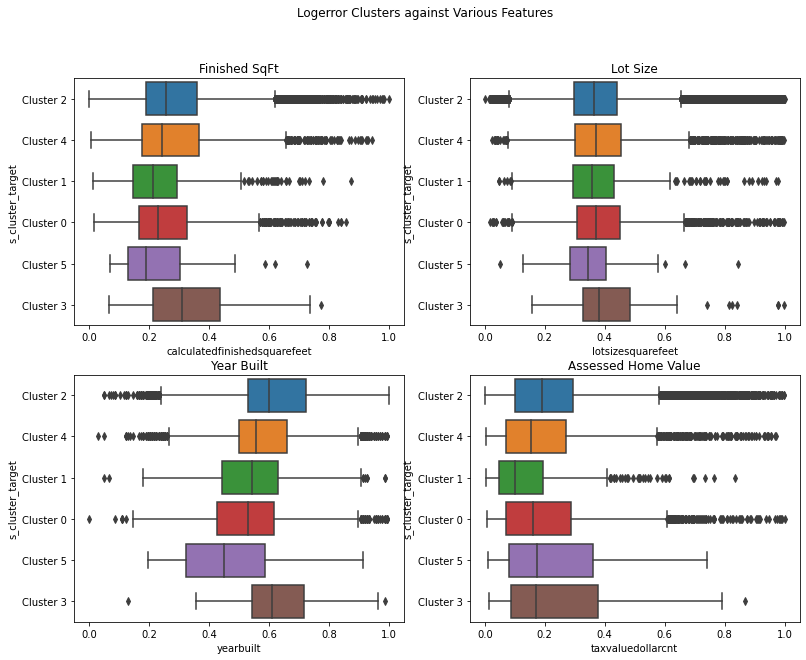

In [10]:
#function to bring in boxplots
explore.boxplots_for_logerror_clusters(train)

## Explore Correlations

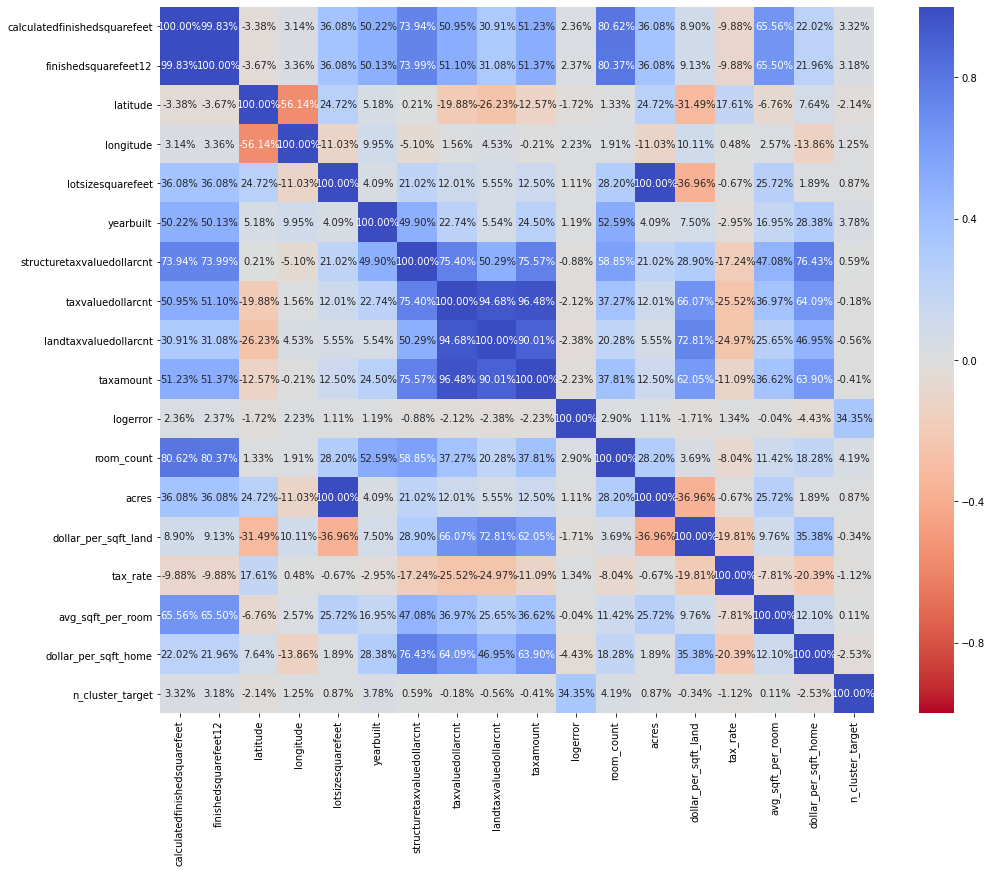

In [12]:
plt.figure(figsize=(16,13))
sns.heatmap(train.corr(), annot=True, cmap="coolwarm_r", fmt=".2%", vmin=-1, vmax=1)

- Since the a above heatmap is a bit overwhelming we'll create a smaller dataframe to explore

In [13]:
df = train[["calculatedfinishedsquarefeet", "lotsizesquarefeet", "yearbuilt", 
            "taxvaluedollarcnt", "logerror", "extras", "County", "room_count",
            "acres", "dollar_per_sqft_land", "avg_sqft_per_room", "dollar_per_sqft_home"]]

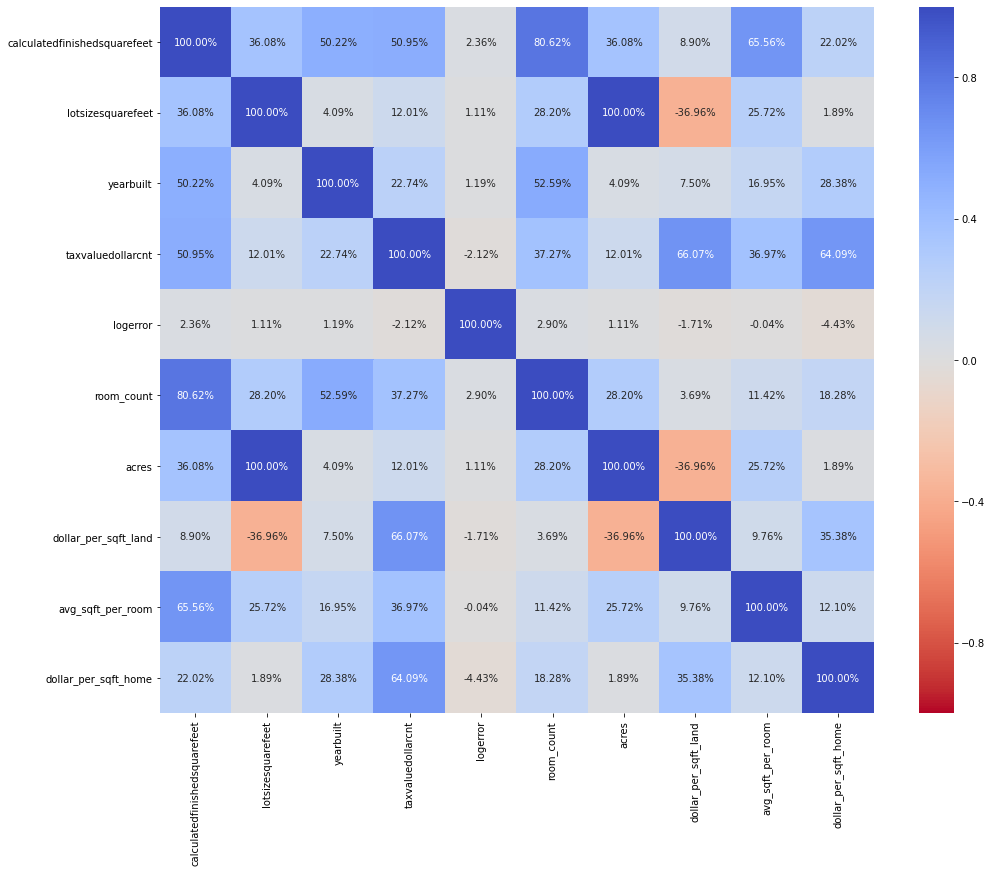

In [15]:
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm_r", fmt=".2%", vmin=-1, vmax=1)

Takeaways:
- Nothing seems to be strongly correlated to logerror.

Next Steps:   
- cluster variables: calculatedsquarefeet, yearbuilt, roomcount, latitude, longitude

## Cluster Independent Variables

### Location cluster

By clustering latitude and logituste we are hoping to have a more granular area instead of using the County's

     k          sse
0    2  1093.000358
1    3   780.449505
2    4   531.366479
3    5   396.686045
4    6   296.886193
5    7   229.020969
6    8   187.164804
7    9   166.372702
8   10   148.708521
9   11   131.289029
10  12   115.230964
11  13   101.827271
12  14    93.282087
13  15    86.048500
14  16    81.105267
15  17    76.900574
16  18    72.023429
17  19    68.426932


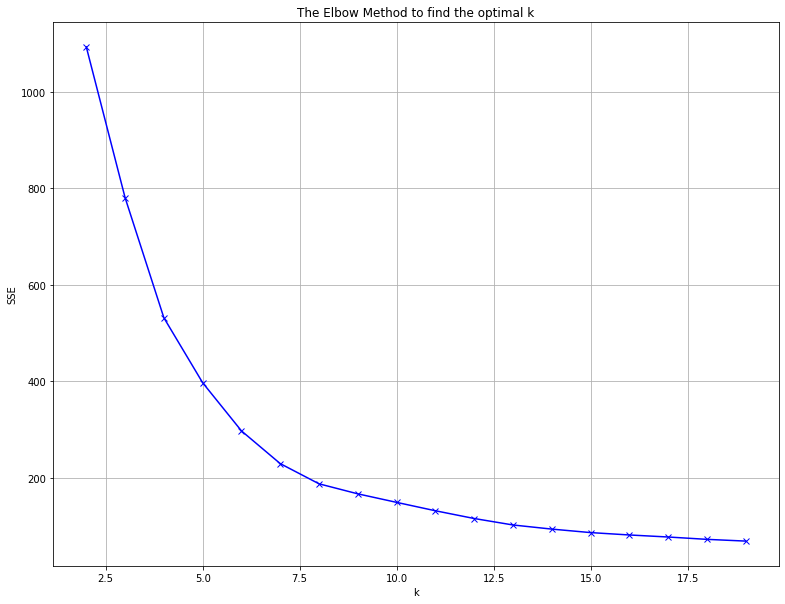

In [18]:
location_cluster = train_scaled[["latitude", "longitude"]]

#find optimal K
explore.find_optimal_k(location_cluster)

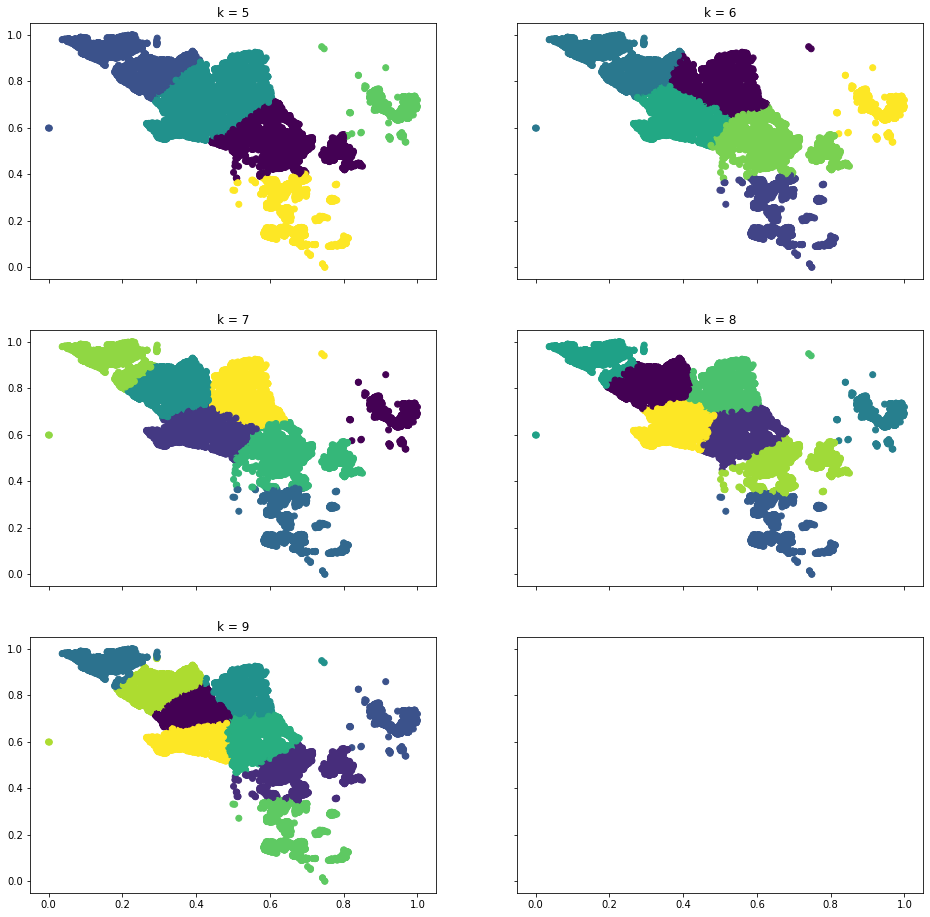

In [20]:
#Take a closer look at k values 5-9
explore.elbow_k_means_plots_2_vars(5, 10, location_cluster)

**Takeaways:**
- 5 and 6 are looking like our best value for K

- for lat and long (our location cluster) we are going to run stats tests on k of 5 and 6 to see which one is more significant

#### Implementation

- We are going to create 2 location clusters with with k of 5 and 6 and add both onto our dataframes(train, test)
- Run T-tests for logerror
- Evaluate each k clustering performance and drop the one that does not perform as well from out dataframes(train, test)

In [22]:
#function to predict and fit onto test and train
train, test, kmeans5, kmeans6 = explore.get_location_clusters(train, test)

**T-Test for K of 5**

- $H_0$ = There is no difference between the mean logerror scores for cluster 0 and the overall mean logerror
- $H_0$ = There is no difference between the mean logerror scores for cluster 1 and the overall mean logerror
- $H_0$ = There is no difference between the mean logerror scores for cluster 2 and the overall mean logerror
- $H_0$ = There is no difference between the mean logerror scores for cluster 3 and the overall mean logerror
- $H_0$ = There is no difference between the mean logerror scores for cluster 4 and the overall mean logerror

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32790 entries, 31268 to 17604
Data columns (total 28 columns):
calculatedfinishedsquarefeet    32790 non-null float64
finishedsquarefeet12            32790 non-null float64
latitude                        32790 non-null float64
longitude                       32790 non-null float64
lotsizesquarefeet               32790 non-null float64
yearbuilt                       32790 non-null float64
structuretaxvaluedollarcnt      32790 non-null float64
taxvaluedollarcnt               32790 non-null float64
landtaxvaluedollarcnt           32790 non-null float64
taxamount                       32790 non-null float64
logerror                        32790 non-null float64
transactiondate                 32790 non-null object
extras                          32790 non-null object
County                          32790 non-null object
room_count                      32790 non-null float64
acres                           32790 non-null float64
dollar_per

In [24]:
#function to run the T-Test on KMeans with 5
p0, p1, p2, p3, p4 = explore.t_test_location_cluster_k5(train)

We fail to reject the null hypothesis for for Cluster 0
We reject the null hypothesis for Cluster 1
We reject the null hypothesis for Cluster 2
We reject the null hypothesis for Cluster 3
We fail to reject the null hypothesis for Cluster 4
Our p value for Cluster 0 is 0.25
Our p value for Cluster 1 is 0.0052
Our p value for Cluster 2 is 0.015
Our p value for Cluster 3 is 6.7e-07
Our p value for Cluster 4 is 0.27


In [32]:
(train.n_location_cluster_k5.value_counts() / len(train)) *100

1    39.487649
3    24.284843
2    19.756023
4     8.328759
0     8.142726
Name: n_location_cluster_k5, dtype: float64

**Takeaways**
- There is significance in 3 of the clusters when compared to logerror
    - The 3 new zones that have the some significance are also the largest sections

**T-Test for K of 6**

- $H_0$ = There is no difference between the mean logerror scores for cluster 0 and the overall mean logerror
- $H_0$ = There is no difference between the mean logerror scores for cluster 1 and the overall mean logerror
- $H_0$ = There is no difference between the mean logerror scores for cluster 2 and the overall mean logerror
- $H_0$  = There is no difference between the mean logerror scores for cluster 3 and the overall mean logerror
- $H_0$  = There is no difference between the mean logerror scores for cluster 4 and the overall mean logerror
- $H_0$  = There is no difference between the mean logerror scores for cluster 6 and the overall mean logerror

In [33]:
k6p0, k6p1, k6p2, k6p3, k6p4, k6p5 = explore.t_test_location_cluster_k6(train)

We fail to reject the null hypothesis for Cluster 0
We reject the null hypothesis for Cluster 1
We fail to reject the null hypothesis for Cluster 2
We fail to reject the null hypothesis for Cluster 3
We reject the null hypothesis for Cluster 4
We reject the null hypothesis for Cluster 5
Our p value for Cluster 0 is 0.62
Our p value for Cluster 1 is 0.0015
Our p value for Cluster 2 is 0.25
Our p value for Cluster 3 is 0.38
Our p value for Cluster 4 is 0.026
Our p value for Cluster 5 is 0.026


In [36]:
(train.n_location_cluster_k6.value_counts() / len(train)) *100

0    22.695944
1    22.207990
5    20.765477
4    20.411711
2     7.676121
3     6.242757
Name: n_location_cluster_k6, dtype: float64

**Takeaways**
- There is significance in 3 of the clusters when compared to logerror
- These zones are a bit more evenly distributed
- After looking at both of these clusters we have decided to keep both and see if one outperforms in the modeling stage

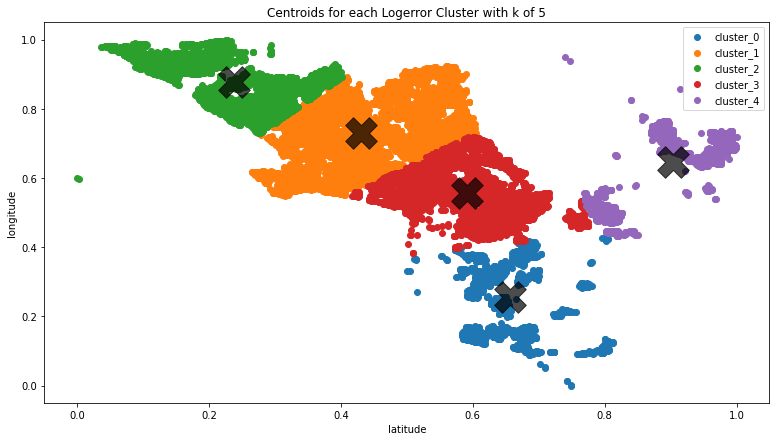

In [38]:
X_train = train[["latitude", "longitude"]]
plt.figure(figsize=(13, 7))
for cluster, subset in train.groupby('s_location_cluster_k5'):
    plt.scatter(subset.latitude, subset.longitude, label=cluster)

centroids_k5 = pd.DataFrame(kmeans5.cluster_centers_, columns=X_train.columns)    

centroids_k5.plot.scatter(x='latitude', y='longitude', ax=plt.gca(), alpha=.7, s=1000, c='black', marker="X")
plt.title("Centroids for each Logerror Cluster with k of 5")
plt.legend()

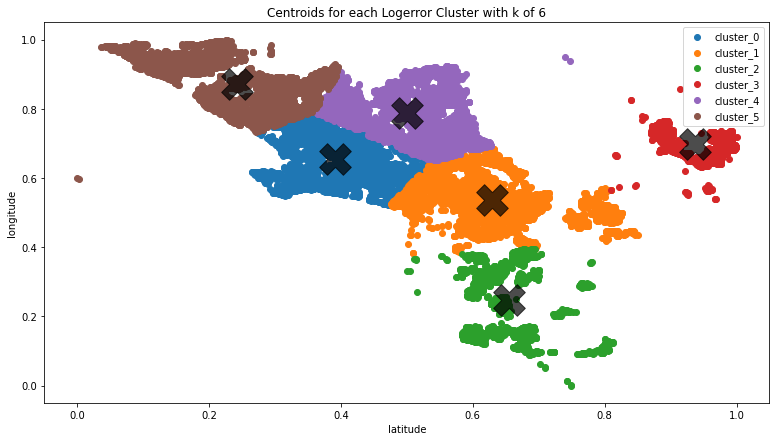

In [39]:
X_train = train[["latitude", "longitude"]]
plt.figure(figsize=(13, 7))
for cluster, subset in train.groupby('s_location_cluster_k6'):
    plt.scatter(subset.latitude, subset.longitude, label=cluster)

centroids_k6 = pd.DataFrame(kmeans6.cluster_centers_, columns=X_train.columns)    

centroids_k6.plot.scatter(x='latitude', y='longitude', ax=plt.gca(), alpha=.7, s=1000, c='black', marker="X")
plt.title("Centroids for each Logerror Cluster with k of 6")
plt.legend()

In [40]:
centroids_k5

,latitude,longitude
0,0.656480,0.255359
1,0.431152,0.729777
2,0.237283,0.877172
3,0.591852,0.557414
4,0.904214,0.647069


In [41]:
centroids_k6

,latitude,longitude
0,0.391385,0.653502
1,0.629271,0.535596
2,0.654522,0.246084
3,0.937762,0.696868
4,0.499797,0.786656
5,0.242357,0.872944


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32790 entries, 31268 to 17604
Data columns (total 28 columns):
calculatedfinishedsquarefeet    32790 non-null float64
finishedsquarefeet12            32790 non-null float64
latitude                        32790 non-null float64
longitude                       32790 non-null float64
lotsizesquarefeet               32790 non-null float64
yearbuilt                       32790 non-null float64
structuretaxvaluedollarcnt      32790 non-null float64
taxvaluedollarcnt               32790 non-null float64
landtaxvaluedollarcnt           32790 non-null float64
taxamount                       32790 non-null float64
logerror                        32790 non-null float64
transactiondate                 32790 non-null object
extras                          32790 non-null object
County                          32790 non-null object
room_count                      32790 non-null float64
acres                           32790 non-null float64
dollar_per

### Year built, room count, and sqft cluster

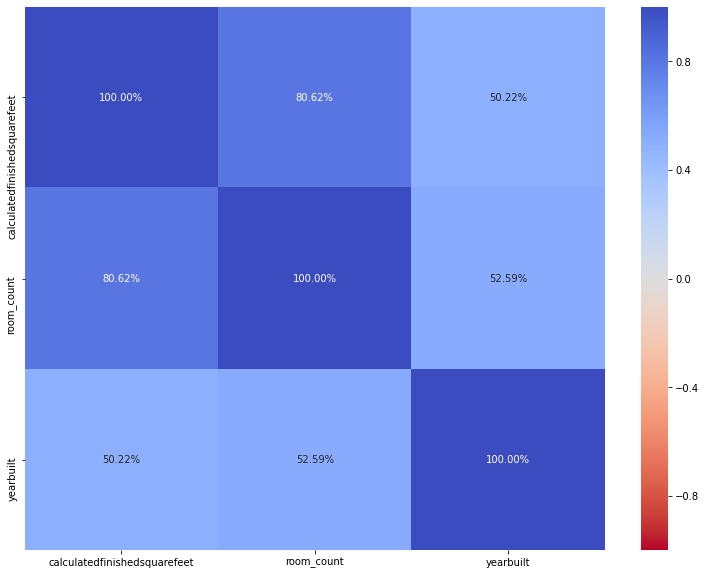

In [50]:
plt.figure(figsize=(13,10))
sns.heatmap(clusters.corr(),annot=True, cmap="coolwarm_r", fmt=".2%", vmin=-1, vmax=1)

- Since these features seemed to be strongly correlated to one another we decided to cluster them

     k          sse
0    2  1133.992813
1    3   843.879922
2    4   696.326553
3    5   575.396646
4    6   497.781056
5    7   440.717936
6    8   395.893177
7    9   361.819804
8   10   336.688862
9   11   314.330208
10  12   299.001081
11  13   283.791292
12  14   270.426629
13  15   257.737450
14  16   246.291542
15  17   235.542703
16  18   227.241647
17  19   220.021733


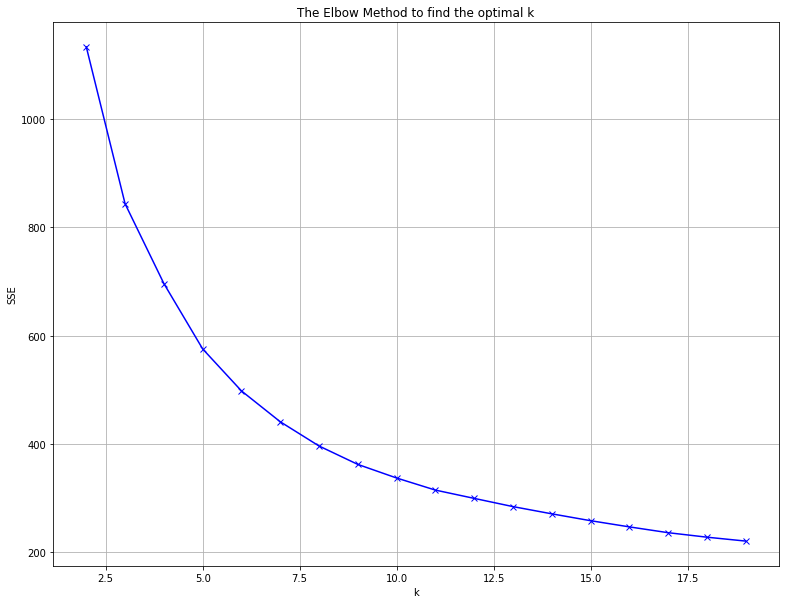

In [51]:
clusters = train_scaled[["calculatedfinishedsquarefeet", "room_count", "yearbuilt"]]

#find optimal k
explore.find_optimal_k(clusters)

- Going to go with a cluster of 6 because it's roughly in the middle of the elbow bend

In [52]:
kmeans, train, test = explore.cluster_year_sqft_roomcount(train_scaled, test_scaled, train, test)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32790 entries, 31268 to 17604
Data columns (total 30 columns):
calculatedfinishedsquarefeet    32790 non-null float64
finishedsquarefeet12            32790 non-null float64
latitude                        32790 non-null float64
longitude                       32790 non-null float64
lotsizesquarefeet               32790 non-null float64
yearbuilt                       32790 non-null float64
structuretaxvaluedollarcnt      32790 non-null float64
taxvaluedollarcnt               32790 non-null float64
landtaxvaluedollarcnt           32790 non-null float64
taxamount                       32790 non-null float64
logerror                        32790 non-null float64
transactiondate                 32790 non-null object
extras                          32790 non-null object
County                          32790 non-null object
room_count                      32790 non-null float64
acres                           32790 non-null float64
dollar_per

<Figure size 936x720 with 0 Axes>

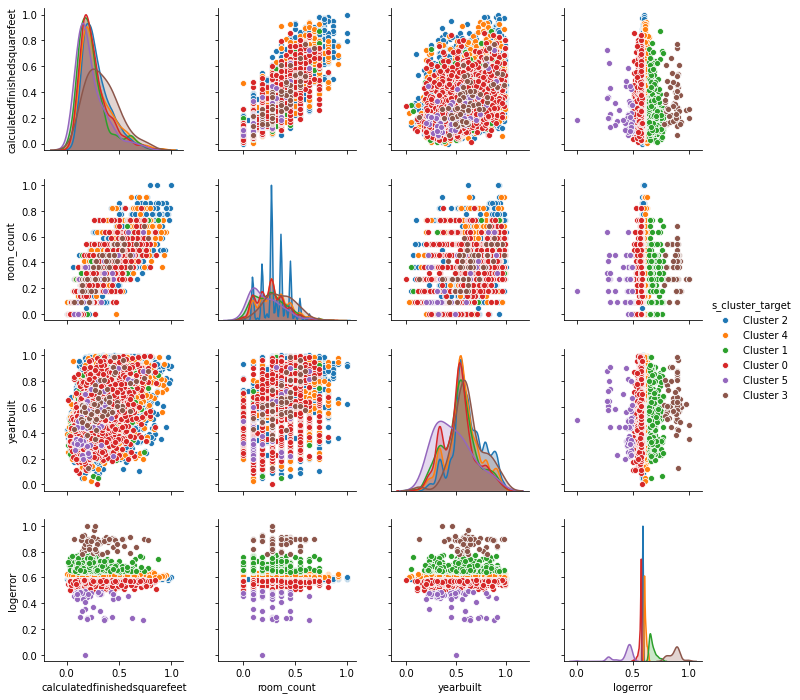

In [60]:
X_train = train[["calculatedfinishedsquarefeet", "room_count", "yearbuilt", "logerror", "County", "s_cluster_target"]]
plt.figure(figsize=(13,10))
sns.pairplot(X_train, hue="s_cluster_target")